In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [68]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Data cleaning

In [69]:
df['day'].unique()  # ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', nan,
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [70]:
df[(df['day'] == 'Sidi-Bel Abbes Region Dataset') | (df['day'] == 'day')]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [71]:
df.loc[:122 , 'Region'] = 0
df.loc[124: , 'Region'] = 1

In [72]:
df.drop(index = 123, inplace=True)  # Remove the row with index 123

In [73]:
df[['Region']] = df[['Region']].astype(int)

In [74]:
df.drop(index = 124, inplace=True)

In [ ]:
df = df.dropna().reset_index(drop=True)  # Remove any rows with null values

In [80]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [81]:
## removing the extra sapace in the column names
df.columns = df.columns.str.strip()

In [82]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [86]:
# change the required columns to int
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)


In [87]:
# change the required columns to float
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [93]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'] = df['Classes'].str.replace('not fire', '0')
df['Classes'] = df['Classes'].str.replace('fire', '1')
df['Classes'] = df['Classes'].astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [95]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
231,19,9,2012,29,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1,1
158,7,7,2012,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7,5.2,1,1
83,23,8,2012,36,53,16,0.0,89.5,37.6,161.5,10.4,47.5,22.3,1,0
84,24,8,2012,34,64,14,0.0,88.9,40.5,171.3,9.0,50.9,20.9,1,0
54,25,7,2012,31,65,18,0.0,84.3,12.5,88.7,4.8,18.5,7.3,1,0


In [101]:
# lets save the cleaned dataframe
df.to_csv('Algerian_forest_fires_dataset_cleaned.csv', index=False)

In [102]:
df_copy = df.drop(['day' , 'month', 'year'], axis=1)
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Fire,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


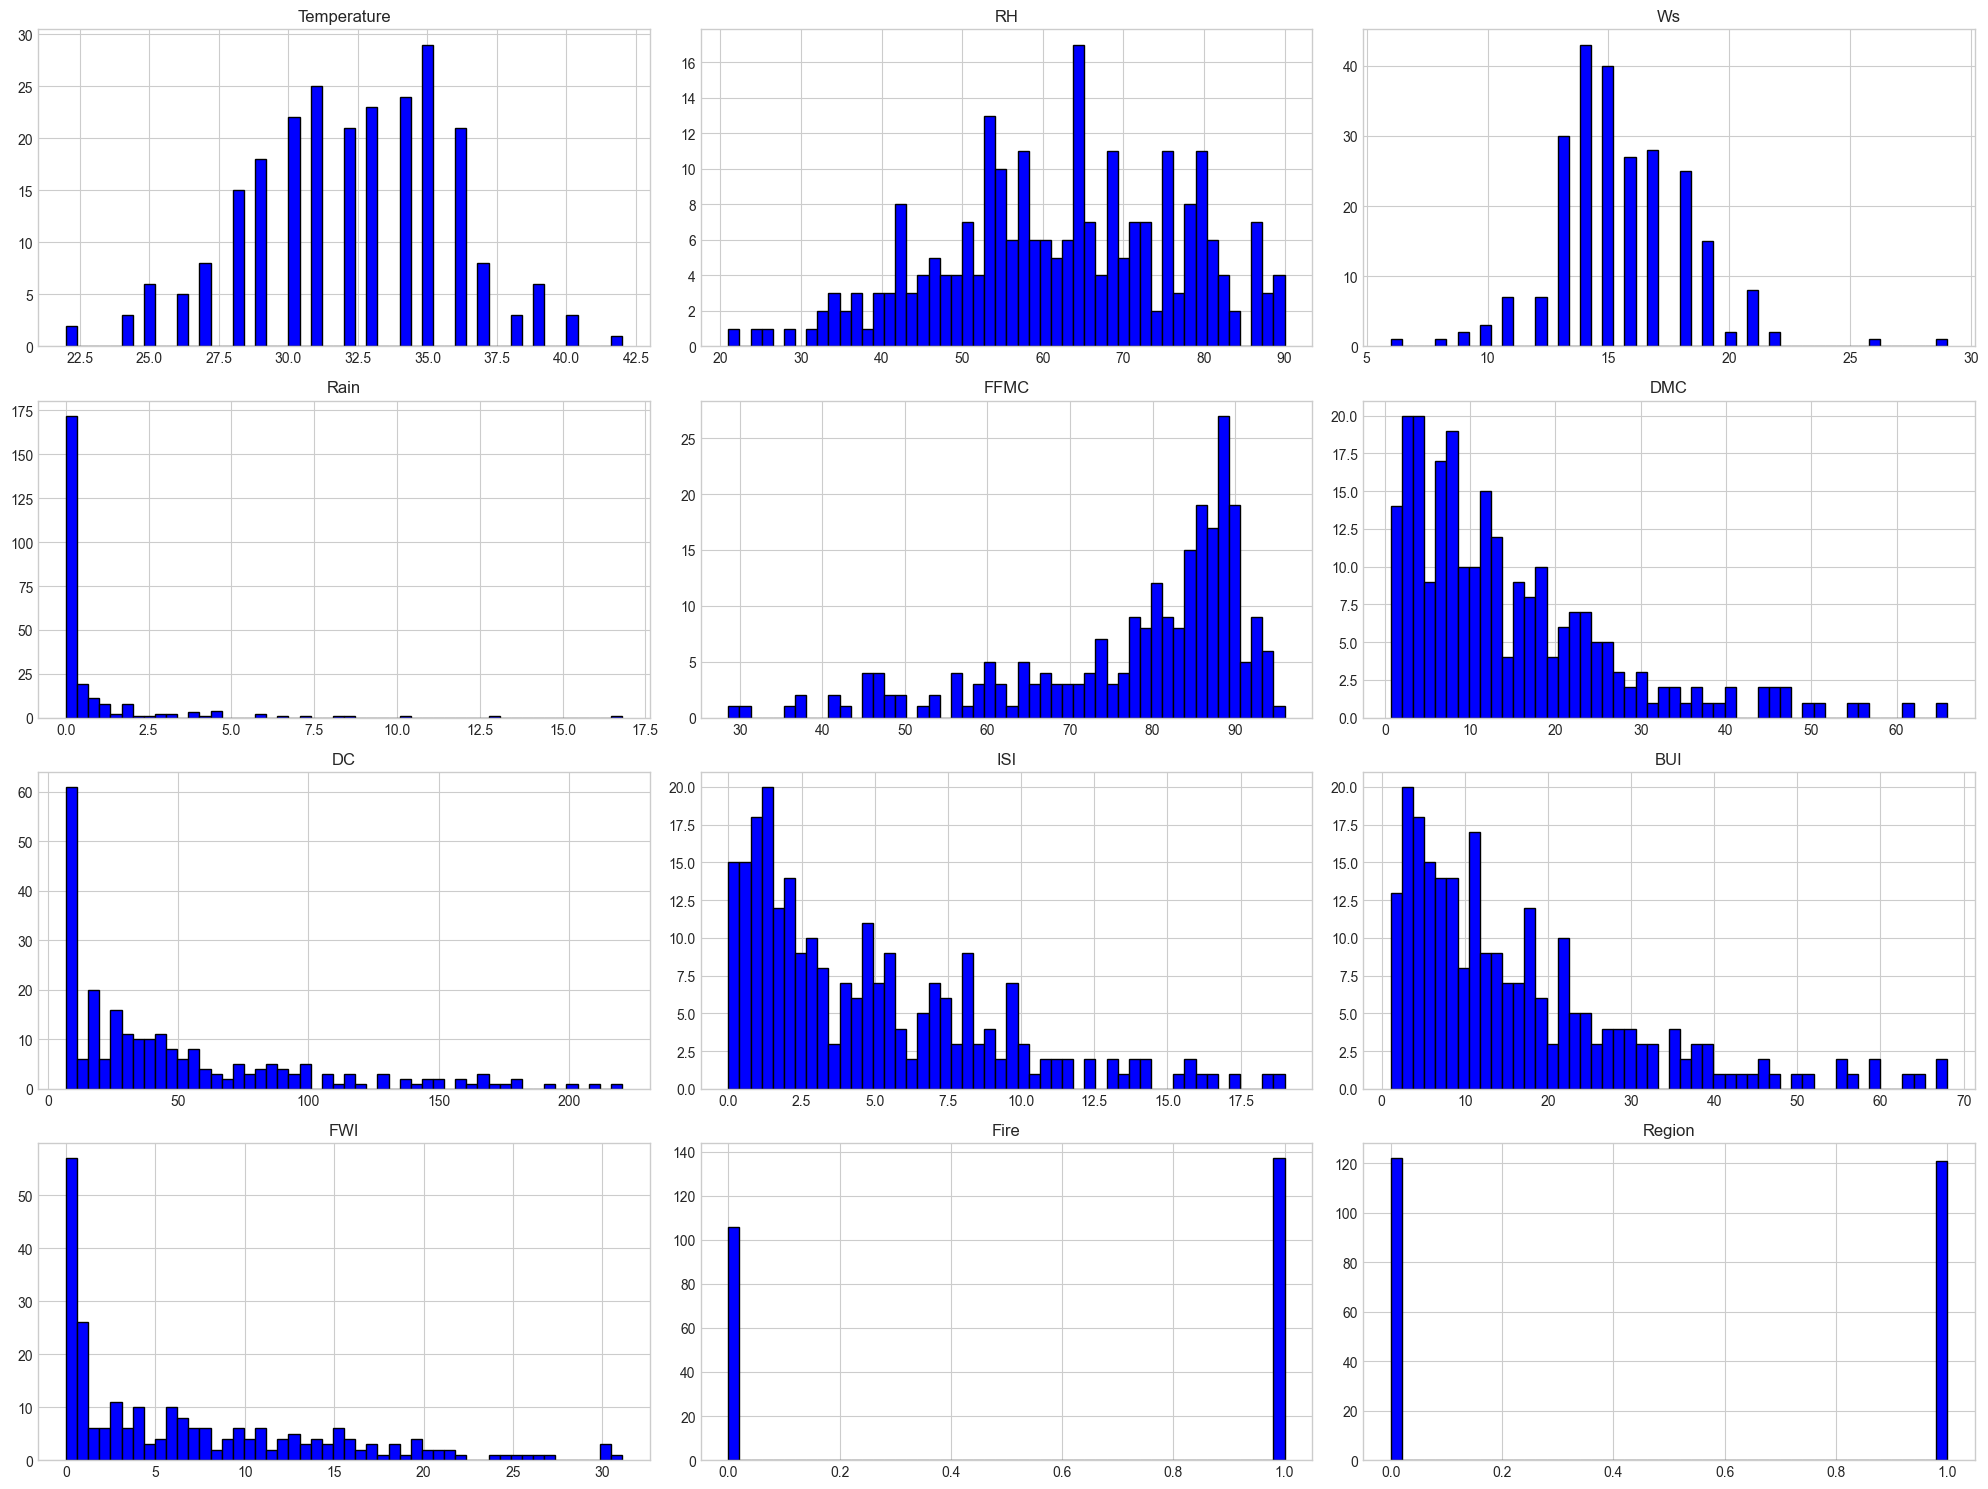

In [112]:
# plot density plot for all features
plt.style.use('seaborn-v0_8-whitegrid')
df_copy.hist(bins=50, figsize=(20, 15), color='blue', edgecolor='black')  # Remove layout argument
plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x1379b57c0>,
 [Text(-0.5251867081006251, -0.9665293175245275, '1'),
  Text(0.5251863931653707, 0.966529488652027, '0')],
 [Text(-0.28646547714579546, -0.5271978095588331, '56.4%'),
  Text(0.28646530536292947, 0.5271979029011056, '43.6%')])

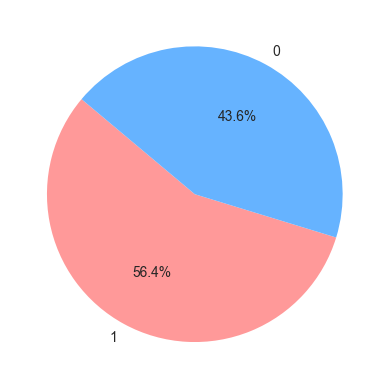

In [115]:
## percentage for pi chart 
plt.pie(df['Fire'].value_counts(), labels=[ 1 , 0], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])

<Axes: >

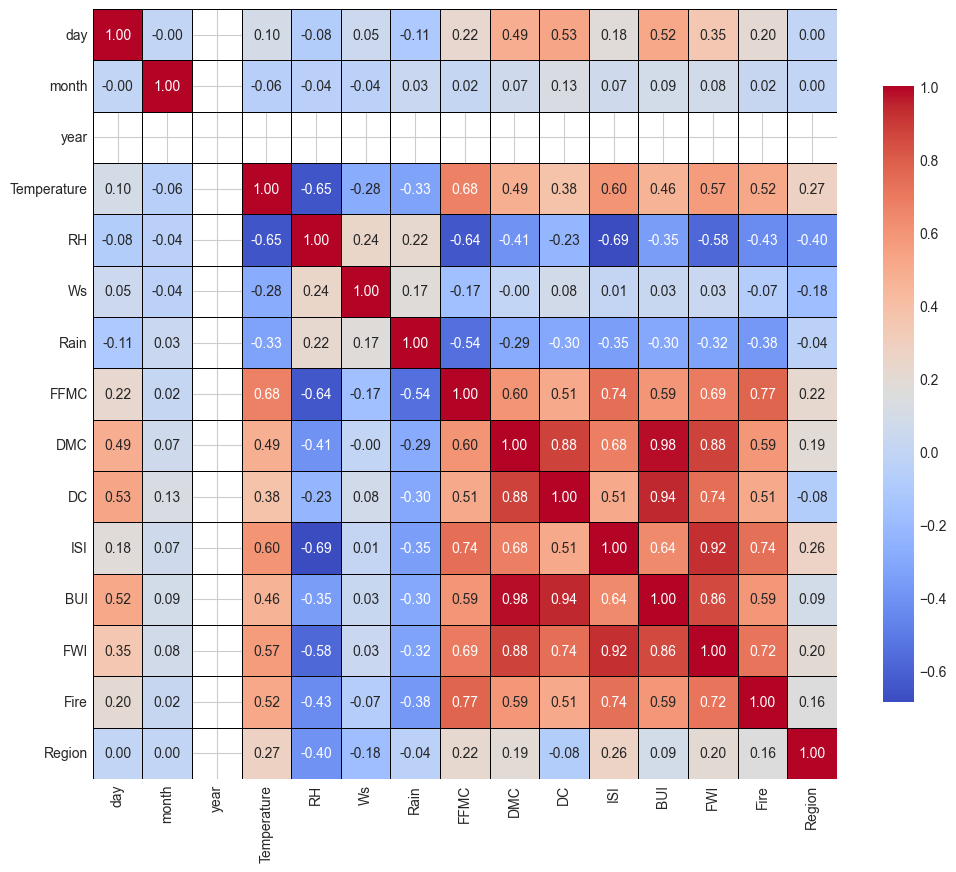

In [123]:
### correlation matrix
df.corr()
## adjuct the size of the plot
plt.figure(figsize=(12, 10))
# plot the heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5 , linecolor='black', cbar_kws={"shrink": .8})

ValueError: Layout of 3x3 must be larger than required size 12

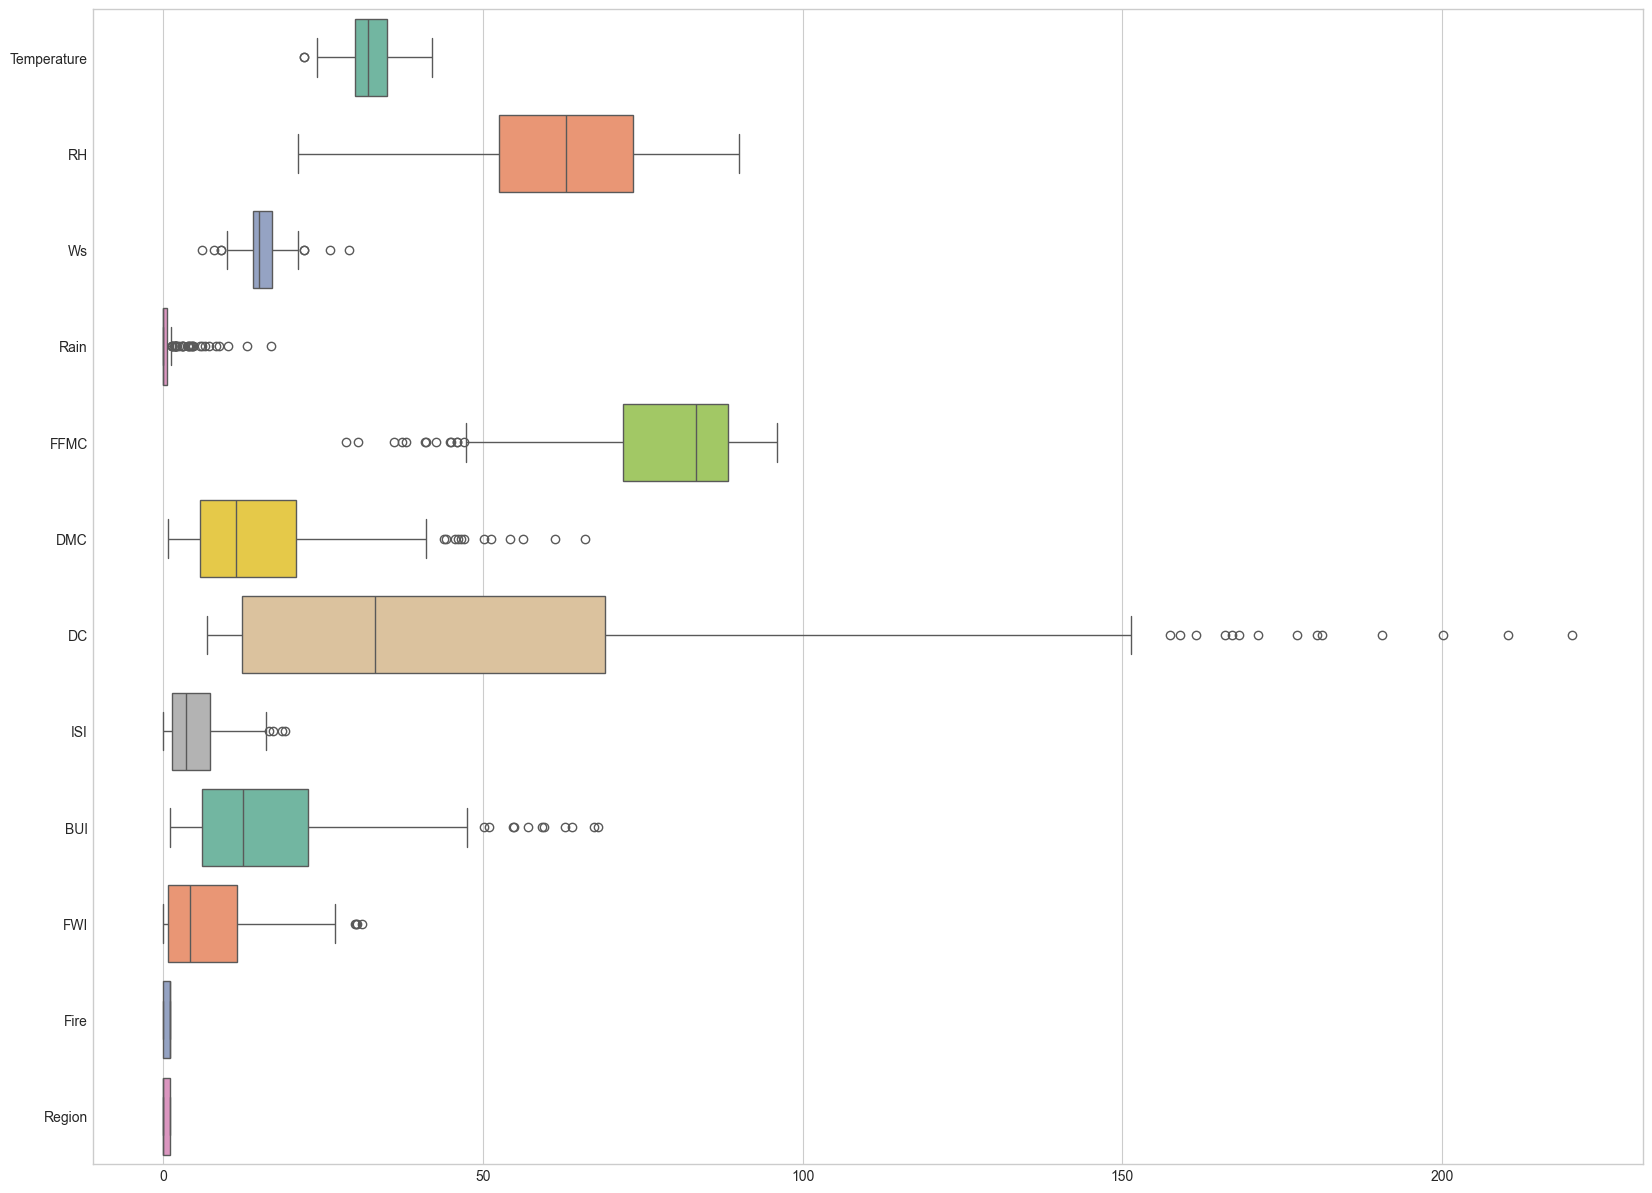

<Figure size 2000x1500 with 0 Axes>

In [125]:
## box plot for all features
plt.figure(figsize=(20, 15))
sns.boxplot(data=df_copy, orient='h', palette='Set2')
# plot density plot for all features
plt.style.use('seaborn-v0_8-whitegrid')  # Use the correct style name
df_copy.hist(bins=30, figsize=(20, 15), layout=(3, 3), color='blue', edgecolor='black')
plt.suptitle('Density Plot for All Features', fontsize=20)
plt.tight_layout()
plt.show()

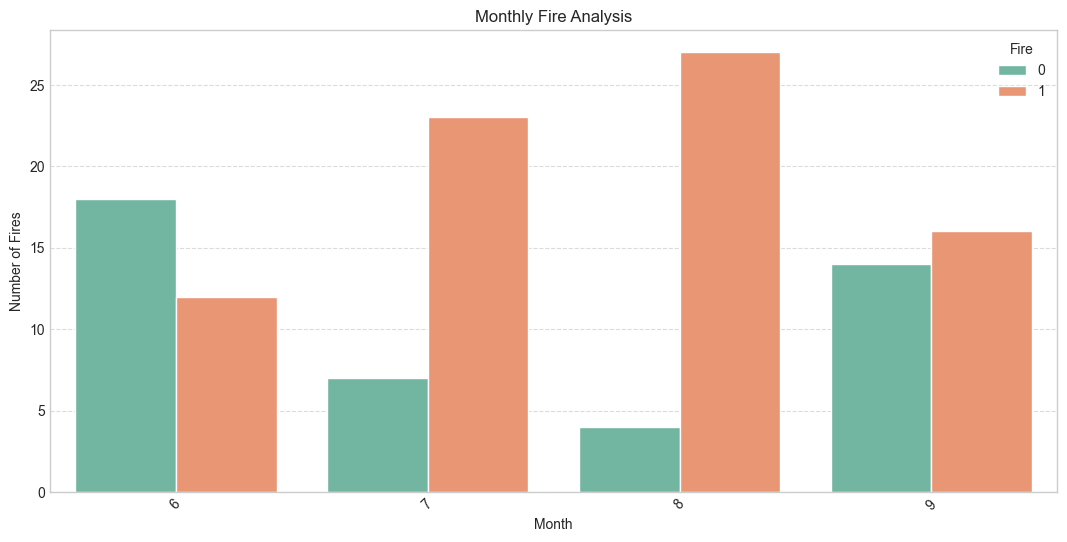

In [133]:
#### monthly fire analysis
dftemp = df[df['Region'] == 1]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue ='Fire', data=dftemp, palette='Set2')
plt.title('Monthly Fire Analysis')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
